In [8]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import seaborn as sns  # 시각화 라이브러리

In [10]:
train = pd.read_csv('data/2017yeartrain.csv', index_col = 'day_text')
test = pd.read_csv('data/2017yeartest.csv', index_col = 'day_text')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 6: invalid start byte

In [3]:
train.info()

NameError: name 'train' is not defined

In [4]:
test.info()

NameError: name 'test' is not defined

In [111]:
train.corr()

H_text   HR_text    S_text   ST_text   DU_text   ER_text  \
H_text       1.000000  0.381357  0.109626 -0.107799  0.080418 -0.002447   
HR_text      0.381357  1.000000 -0.020410  0.009257 -0.045893 -0.019503   
S_text       0.109626 -0.020410  1.000000  0.024302 -0.070301 -0.023027   
ST_text     -0.107799  0.009257  0.024302  1.000000 -0.174138  0.042208   
DU_text      0.080418 -0.045893 -0.070301 -0.174138  1.000000  0.014275   
ER_text     -0.002447 -0.019503 -0.023027  0.042208  0.014275  1.000000   
result_text  0.411615  0.267704  0.168250 -0.177470 -0.079218 -0.172610   
temp         0.067297  0.050888 -0.003281 -0.068097 -0.003311 -0.034883   
rain         0.002754 -0.024830 -0.000741  0.001156 -0.005420 -0.012892   
humidity     0.006877  0.052948 -0.037783  0.051873  0.006083 -0.031010   

             result_text      temp      rain  humidity  
H_text          0.411615  0.067297  0.002754  0.006877  
HR_text         0.267704  0.050888 -0.024830  0.052948  
S_text          0.168250 -0.003281 -0.000741 -0.037783  
ST_text        -0.177470 -0.068097  0.001156  0.051873  
DU_text        -0.079218 -0.003311 -0.005420  0.006083  
ER_text        -0.172610 -0.034883 -0.012892 -0.031010  
result_text     1.000000  0.000000  0.000000  0.000000  
temp            0.000000  1.000000 -0.006105 -0.180981  
rain            0.000000 -0.006105  1.000000  0.012211  
humidity        0.000000 -0.180981  0.012211  1.000000

### 데이터 탐색(result_text 의 빈도가 높은 경우를 찾기)

In [6]:
test_result = test[['team_text', 'result_text', 'location']].groupby(['team_text','result_text']).count()
test_result

location
team_text result_text          
KIA 타이거즈  0                 176
          1                 163
LG 트윈스    0                 168
          1                 173
NC 다이노스   0                 186
          1                 157
SK 와이번스   0                 153
          1                 186
kt wiz    0                 185
          1                 147
두산 베어스    0                 127
          1                 222
롯데 자이언츠   0                 177
          1                 157
삼성 라이온즈   0                 181
          1                 147
키움 히어로즈   0                 163
          1                 190
한화 이글스    0                 183
          1                 157

### 온도 5도 기준으로 나눠서 시각화
- 어느 온도에서 야구 경기가 많이 이루어졌는지 볼 수 있음

In [7]:
bins = [5,11,16,21,26,31,36,41]  # 구간 만들기
labels = ['5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40']
train['temp'] = pd.cut(train['temp'], bins = bins, labels = labels)
test['temp'] = pd.cut(test['temp'], bins = bins, labels = labels)

<AxesSubplot:xlabel='temp', ylabel='count'>

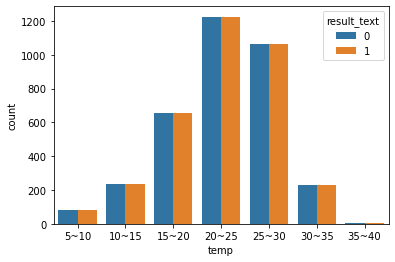

In [8]:
sns.countplot(data = train, x = 'temp', hue='result_text')

### 강수량 3mm 를 기준으로 나눠서 시각화

In [9]:
bins = [0,4,7,10,13,16,19]  # 구간 만들기
labels = ['0~3', '3~6', '6~9', '9~12', '12~15', '15~18']
train['rain'] = pd.cut(train['rain'], bins = bins, labels = labels)
test['rain'] = pd.cut(test['rain'], bins = bins, labels = labels)

<AxesSubplot:xlabel='rain', ylabel='count'>

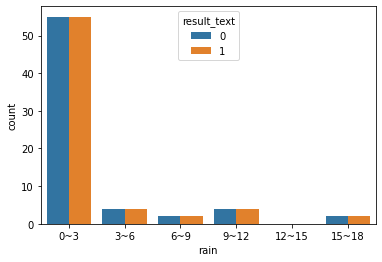

In [10]:
sns.countplot(data = train, x = 'rain', hue='result_text')

### 습도 10% 를 기준으로 나눠서 시각화

In [11]:
bins = [0,11,21,31,41,51,61,71,81,91,101]  # 구간 만들기
labels = ['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100']
train['humidity'] = pd.cut(train['humidity'], bins = bins, labels = labels)
test['humidity'] = pd.cut(test['humidity'], bins = bins, labels = labels)

<AxesSubplot:xlabel='humidity', ylabel='count'>

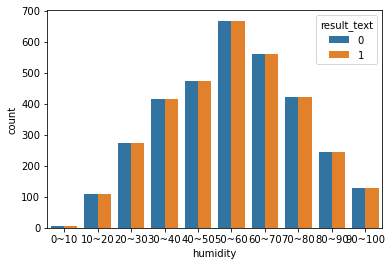

In [12]:
sns.countplot(data = train, x = 'humidity', hue='result_text')

### 일단 팀 구별 없이 데이터 넣고 모델 돌려보기
- 팀 이름 데이터와 location 데이터 drop

* 위에서 부터 실행 시킬때 카테고리화 되기 때문에 데이터 다시 불러와야함

In [112]:
train.drop('team_text', axis = 1 , inplace = True)
test.drop('team_text', axis = 1 , inplace = True)

In [113]:
train.drop('location', axis = 1 , inplace = True)
test.drop('location', axis = 1 , inplace = True)

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 4.7 to 7.7
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   H_text       7000 non-null   int64  
 1   HR_text      7000 non-null   int64  
 2   S_text       7000 non-null   int64  
 3   ST_text      7000 non-null   int64  
 4   DU_text      7000 non-null   int64  
 5   ER_text      7000 non-null   int64  
 6   result_text  7000 non-null   int64  
 7   temp         7000 non-null   float64
 8   rain         7000 non-null   float64
 9   humidity     7000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 601.6+ KB


In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3398 entries, 7.7 to 10.26토
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   H_text       3398 non-null   int64  
 1   HR_text      3398 non-null   int64  
 2   S_text       3398 non-null   int64  
 3   ST_text      3398 non-null   int64  
 4   DU_text      3398 non-null   int64  
 5   ER_text      3398 non-null   int64  
 6   result_text  3398 non-null   int64  
 7   temp         3398 non-null   float64
 8   rain         3398 non-null   float64
 9   humidity     3398 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 292.0+ KB


#### train 과 test 데이터 설정

In [116]:
y_train = train['result_text']
X_train = train.drop('result_text', axis = 1)
y_test = test['result_text']
X_test = test.drop('result_text', axis = 1)

### KNN 모델

In [117]:
knn_model = KNeighborsClassifier(n_neighbors = 50)
result = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv = 5)
result

array([0.67214286, 0.69785714, 0.68928571, 0.69928571, 0.67785714])

In [118]:
result.mean()

0.6872857142857143

#### KNN Scaler 적용

In [119]:
scaler = StandardScaler()

In [120]:
scaler.fit(X_train)  # 평균과 표준편차로 scaling 한 값을 컴퓨터가 기억

StandardScaler()

In [121]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[ 0.39440379, -0.86226809,  1.10850335, ..., -2.42099129,
        -0.06986745, -0.53554598],
       [ 0.12547465,  0.09186985,  1.10850335, ..., -2.42099129,
        -0.06986745, -0.53554598],
       [-0.95024191, -0.86226809,  1.10850335, ..., -2.86576949,
        -0.06986745, -0.88029456],
       ...,
       [-0.41238363, -0.86226809, -0.784987  , ...,  0.63685884,
        -0.06986745,  1.74841335],
       [ 0.39440379,  2.9542837 , -0.784987  , ...,  0.32180762,
        -0.06986745,  1.70531977],
       [-0.14345449,  0.09186985, -0.784987  , ...,  0.32180762,
        -0.06986745,  1.70531977]])

In [122]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[ 1.20119121,  2.00014575, -0.784987  , ...,  0.91484522,
        -0.06986745,  0.97272904],
       [ 0.12547465, -0.86226809, -0.784987  , ...,  0.91484522,
        -0.06986745,  0.97272904],
       [ 0.39440379,  0.09186985,  0.16175818, ...,  0.50713187,
        -0.06986745,  1.18819691],
       ...,
       [-1.48810019, -0.86226809, -0.784987  , ..., -1.12372154,
        -0.06986745,  0.54179332],
       [ 1.20119121, -0.86226809,  0.16175818, ..., -2.36539401,
        -0.06986745,  0.1108576 ],
       [ 0.66333293, -0.86226809, -0.784987  , ..., -2.36539401,
        -0.06986745,  0.1108576 ]])

In [123]:
result = cross_val_score(knn_model,
                        transform_X_train,
                        y_train,
                        cv = 5)
result

array([0.72571429, 0.70857143, 0.72357143, 0.72142857, 0.71142857])

In [124]:
result.mean()

0.7181428571428572

#### KNN Scaler 적용

In [125]:
y_pred = knn_model.fit(transform_X_train, y_train).predict(transform_X_test)

In [126]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (transform_X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 969


In [127]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.71


### Decision Tree 모델

In [43]:
tree_model = DecisionTreeClassifier(max_depth = 7)

In [44]:
result = cross_val_score(tree_model,
                        X_train,
                        y_train,
                        cv = 10)
result

array([0.67714286, 0.67714286, 0.68285714, 0.66142857, 0.67571429,
       0.70428571, 0.68285714, 0.68285714, 0.66857143, 0.71285714])

In [45]:
result.mean()

0.6825714285714286

In [46]:
y_pred = tree_model.fit(X_train, y_train).predict(X_test)

In [47]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 1017


In [48]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.70


### Naive Bayes 분류 모델

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
nb = GaussianNB()

In [51]:
y_pred = nb.fit(X_train, y_train).predict(X_test)

In [52]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 1010


In [53]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.70


### SVM 분류 모델

In [54]:
svm_model = SVC(kernel='rbf', C=300, gamma=0.0001)

In [55]:
y_pred = svm_model.fit(X_train, y_train).predict(X_test)

In [56]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 955


In [57]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.72


### XGBOOST 모델

In [60]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [61]:
xgb = XGBClassifier(n_estimators = 5000, learning_rate = 0.001, max_depth = 5)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

C:\Users\smhrd\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != xgb_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 958


In [63]:
print("예측 정확도: {:.2f}".format(np.mean(xgb_pred == y_test)))

예측 정확도: 0.72


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [77]:
train_data, train_label = shuffle(X_train, y_train, random_state = 5)

In [93]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(X_test)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [94]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  72.61 %
Accuracy :  71.44 %
Accuracy :  75.89 %
Accuracy :  100.0 %
Accuracy :  70.43 %


In [96]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != log_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 948


### Gradient Boosting 

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [103]:
gb = GradientBoostingClassifier(random_state = 0 )
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [105]:
pred = gb.predict(X_test)
print("정확도 : {0: .3f}".format(accuracy_score(y_test,pred)))

정확도 :  0.716


In [106]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 965
